
<font size=5>Task 1</font>

$(1)$ Given that $X$ is uniformly distributed in $C_1$, we want to find $d$ such that $Pr(X \in C_d)=q$. The probability of $X$ being in $C_d$ is the ratio of volume of $C_d$ to the volume of $C_1$.

The volume of $C_d$ id given by $(d)^p$(the side length of $C_d$ is $d$), and the volume of $C_1$ is $2^p$(the side length of $C_1$ is 1). 

Therefore, the probability can be espressed as:

$$\frac{Pr(X\in C_d)}{Pr(X\in C_1)}=\frac{(d)^p}{1^p}=q$$

Solve for $d$, we get:

$$d^p = q$$

$$d = q^{1/p}$$


$(2)$ Since the components are independent, the probability that all of them lie within the interval $[-2.576,2.576]$ is $0.99^p$, and the probability that at least one of them lies outside the interval $[-2.576,2.576]$ is $1-0.99^P$.

So the probability for $p = 2, p = 3,$ and  $p = 500$ are following:


$\displaystyle
\begin{array}{l}
    •For\;p=2: 1-0.99^2 \approx 0.0199 \\
    •For\;p =3: 1-0.99^3 \approx 0.0297\\
    •For\;p = 500: 1 - 0.99^{500} \approx 0.99
\end{array}
$


<font size=5>Task 2</font>

(1)

Text(0.5, 1.0, 'Uniformly sampled vectors in $[-1, 1]^2$')

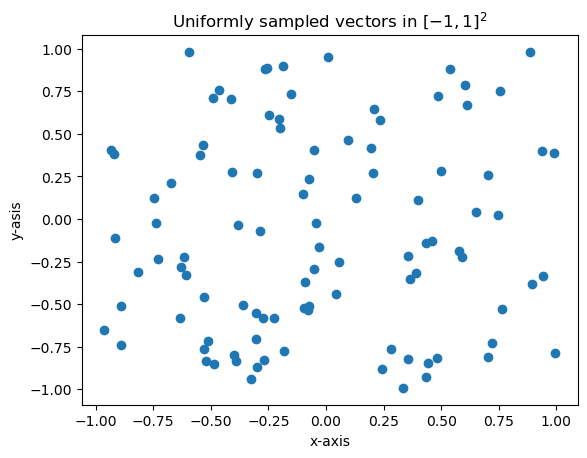

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def generate_random_vectors(num_vectors, dimension):
    """
    Generate random vectors.

    Parameters:
    - num_vectors: Number of random vectors.
    - dimension: Dimensions of each vector.

    Returns:
    - random_vectors: Generated random vectors.
    """
    random_vectors = np.random.uniform(low=-1, high=1, size=(dimension, num_vectors))
    return random_vectors

# Visualize generated data
random_vectors = generate_random_vectors(100,2)
plt.scatter(random_vectors[0, :], random_vectors[1, :])
plt.xlabel('x-axis')
plt.ylabel('y-asis')
plt.title('Uniformly sampled vectors in $[-1, 1]^2$')

(2)

In [2]:
def compute_min_angles(random_vectors):
    """
    Compute the minimum angle.

    Parameters:
    - random_vectors: Generated random vectors.

    Returns:
    - angle: The minimum angle.
    """

    [d, n] = np.shape(random_vectors)
    angle = []
    x_range = range(n)
    for i in x_range:
        y_range = range(n)
        y_range = np.delete(range(n), i)
        angles = [random_vectors[:,i].T.dot(random_vectors[:,j])/(np.linalg.norm(random_vectors[:,i])*np.linalg.norm(random_vectors[:,j]))
              for j in y_range]
        angles = np.arccos(angles)
        angle.append(np.min(angles))    # determine the minimum angle
    return angle

angle = compute_min_angles(random_vectors)
print('The average angle: ', np.mean(angle))    

The average angle:  0.030054232990347512


(3)

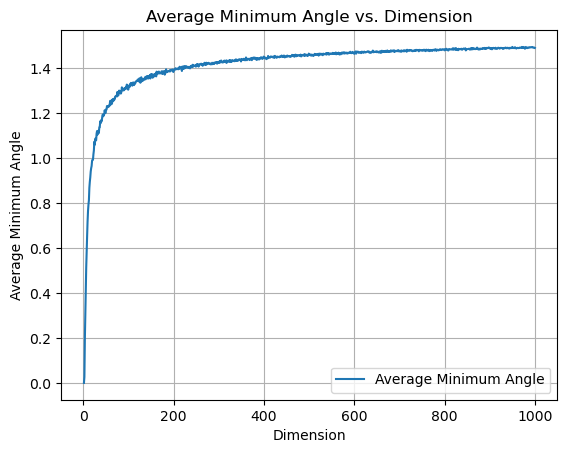

In [3]:

dimensions = np.arange(1, 1001)
avg_angles = []     # intialize
for d in dimensions:
    random_vectors = generate_random_vectors(100,d)
    avg_angles.append(np.mean(compute_min_angles(random_vectors)))


# Plotting the results
plt.figure()
plt.plot(dimensions, avg_angles, label='Average Minimum Angle')
plt.title('Average Minimum Angle vs. Dimension')
plt.xlabel('Dimension')
plt.ylabel('Average Minimum Angle')
plt.legend()
plt.grid(True)
plt.show()


(4)

As the dimension increase, the average minimum angles between randomly sampled vectors increase dramatically in the first 200 dimensions and then converge at a certain value (about $\frac{\pi}{2}$\).

this is related to the phenomenon known as the "Curse of Dimensionality."

The Curse of Dimensionality refers to the sparsity of data distribution in high-dimensional space, making distance measurements difficult, and relative distances between data points become farther apart. In high-dimensional space, the angles between two randomly sampled vectors may increase because, in such spaces, most vectors tend to concentrate near the edges of the space, resulting in wider angles relative to the center of the space.



（5）

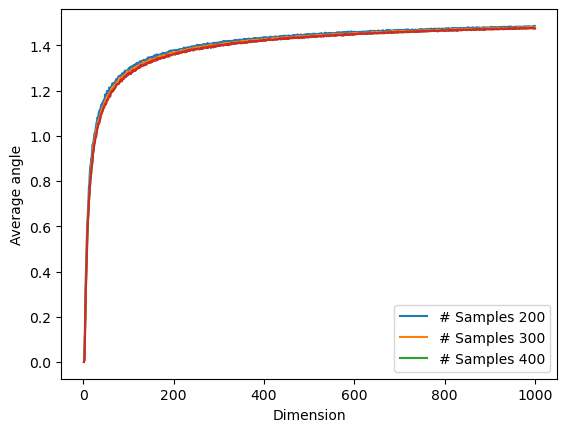

In [4]:
angles = []     # intialize
n1 = 200    # total number of samples n=200
for d in dimensions:
    random_vectors1 = generate_random_vectors(n1, d)
    angles.append(np.mean(compute_min_angles(random_vectors1)))
plt.plot(dimensions, angles)

angles = []     # intialize
n2 = 300    # total number of samples n=200
for d in dimensions:
    random_vectors1 = generate_random_vectors(n2, d)
    angles.append(np.mean(compute_min_angles(random_vectors1)))
plt.plot(dimensions, angles)

angles = []     # intialize
n3 = 400    # total number of samples n=200
for d in dimensions:
    random_vectors3 = generate_random_vectors(n3, d)
    angles.append(np.mean(compute_min_angles(random_vectors3)))  
plt.plot(dimensions, angles)

text1 = '# Samples ' + str(n1)
text2 = '# Samples ' + str(n2)
text3 = '# Samples ' + str(n3)

plt.plot(dimensions, angles)
plt.xlabel('Dimension')
plt.ylabel('Average angle')
plt.legend([text1, text2, text3])
    
plt.show()

When the sample size increase, the average minimum angle decrease, and the decreasing speed also decrease.